# Data and Decisions - Individual Assignment

Assignment Brief

Looking at customer churn in the Telco Dataset

*What according to you are the most important determinants of customer churn at this company? Present convincing arguments based on insights from the dataset and/or other research about the industry*

*What are the limitations of your argument?*

*Based on your analysis propose possible interventions or next steps that the management team should consider*

*Please be precise and suggest mechanisms to test the impact of the interventions*

# Problem Formulation

In many (business) cases it is equally important to not only have an accurate, but also an interpretable model. Oftentimes, apart from wanting to know what our model’s house price prediction is, we also wonder why it is this high/low and which features are most important in determining the forecast. Another example might be predicting customer churn — it is very nice to have a model that is successfully predicting which customers are prone to churn, but identifying which variables are important can help us in early detection and maybe even improving the product/service!

In [25]:
from platform import python_version
print(python_version())

3.5.4


In [1]:
%matplotlib inline
# Basic Libraries
import numpy as np
import pandas as pd

# Deep learning
import tensorflow as tf

# Classifier (machine learning algorithm) 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load data

telco_df = pd.read_csv("Telco-Customer-Churn-clean.csv")

In [3]:
telco_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [4]:
#telco_df.info()

## Preprocessing

Dataset contained 11 missing values in TotalCharges. These records where removed from the dataset as they compirsed a very small amount of the data. It simplified the process to remove them rather than impute the values.



The preprocessing required will be around converting variables from categorical to numeric. As we can see in the data types above, there are some values that are continuous, but most are categorical objects. Depending on what kind of analysis tools we will be using we may have to process and clean the data.

Later we will need to select features to be used in the model, so let's explore the data.

## Exploratory Data Analysis
### Viz
To help with visualizing, found some functions to speed things up. Kindly shared on https://www.kaggle.com/jatturat/finding-important-factors-to-survive-titanic. Check for some insights on feature scaling

In [5]:
# Continuous Data Plot
def cont_plot(df, feature_name, target_name, palettemap, hue_order, feature_scale): 
    df['Counts'] = "" # A trick to skip using an axis (either x or y) on splitting violinplot
    fig, [axis0,axis1] = plt.subplots(1,2,figsize=(10,5))
    sns.distplot(df[feature_name], ax=axis0);
    sns.violinplot(x=feature_name, y="Counts", hue=target_name, hue_order=hue_order, data=df,
                   palette=palettemap, split=True, orient='h', ax=axis1)
    axis1.set_xticks(feature_scale)
    plt.show()

# Categorical Data Plot    
def cat_plot(df, feature_name, target_name, palettemap): 
    fig, [axis0,axis1] = plt.subplots(1,2,figsize=(10,5))
    df[feature_name].value_counts().plot.pie(autopct='%1.1f%%',ax=axis0)
    sns.countplot(x=feature_name, hue=target_name, data=df,
                  palette=palettemap,ax=axis1)
    plt.show()

# Setting colour palette for use
survival_palette = {0: "black", 1: "orange"} # Color map for visualization


Since there are many variables in the dataset, want to look at the relationships between the different variables - categorical and continuous - with churn

Below are the variables visualized

In [6]:
df_colnames = [col for col in telco_df.columns]
df_colnames = pd.DataFrame(df_colnames)

In [7]:
df_colnames

,0
0,customerID
1,gender
2,SeniorCitizen
3,Partner
4,Dependents
5,tenure
6,PhoneService
7,MultipleLines
8,InternetService
9,OnlineSecurity


In [8]:
df_colnames_cat = df_colnames.drop([0,5,18,19,20]).values
df_colnames_cont = df_colnames.loc[[5,18,19]].values

## Continuous Variables

/anaconda3/envs/tfdeeplearning/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


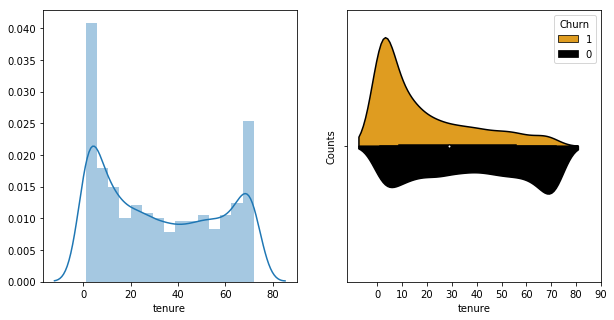

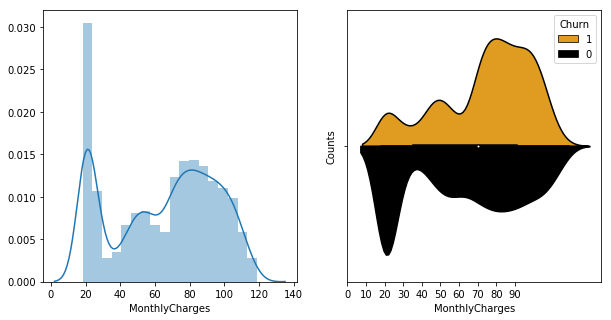

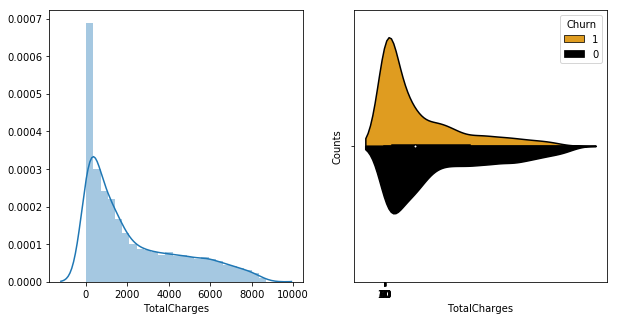

In [217]:
for lbl in df_colnames_cont:
    df = telco_df[[lbl[0],'Churn']]
    cont_plot(df, lbl[0], 'Churn', survival_palette, [1,0], range(0,100,10))


## Categorical Variables

gender


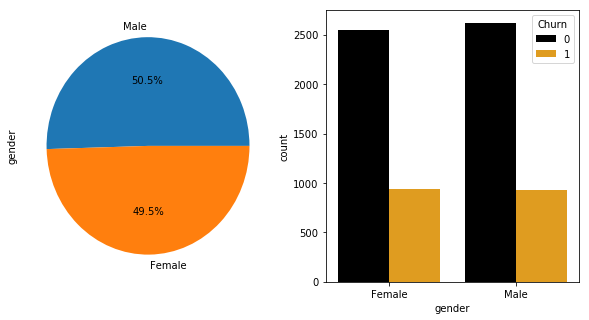

SeniorCitizen


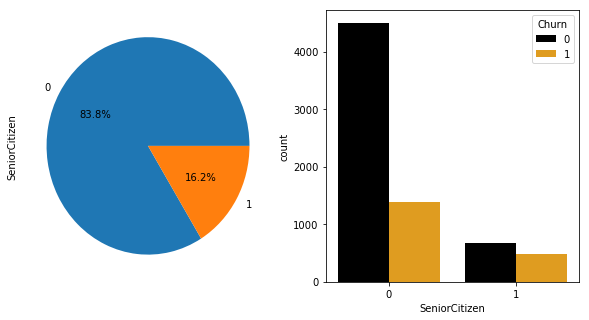

Partner


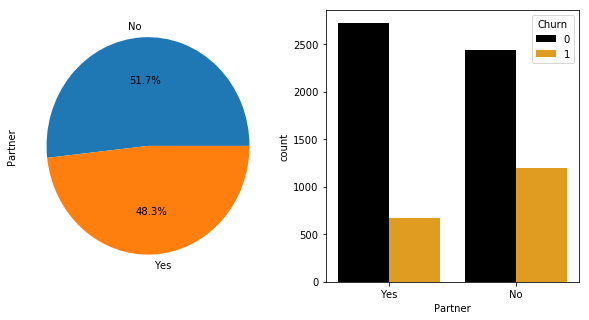

Dependents


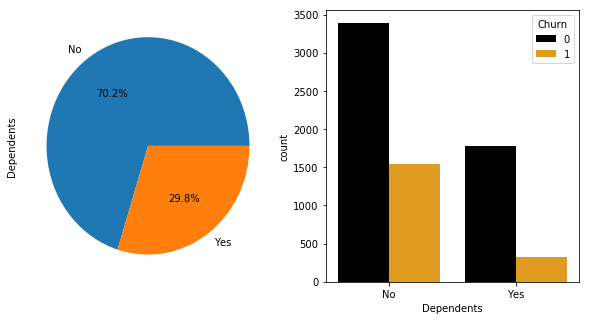

PhoneService


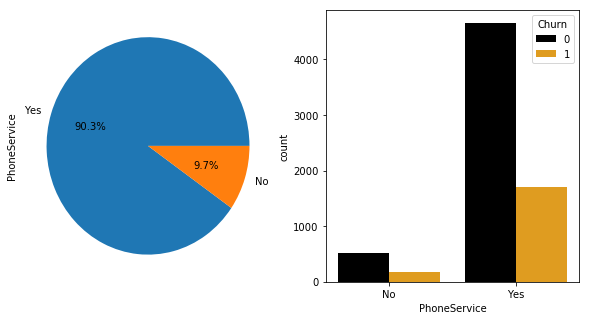

MultipleLines


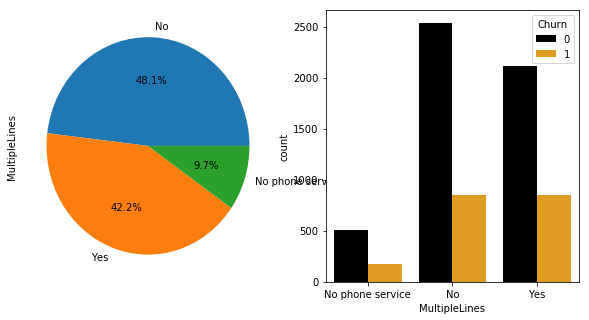

InternetService


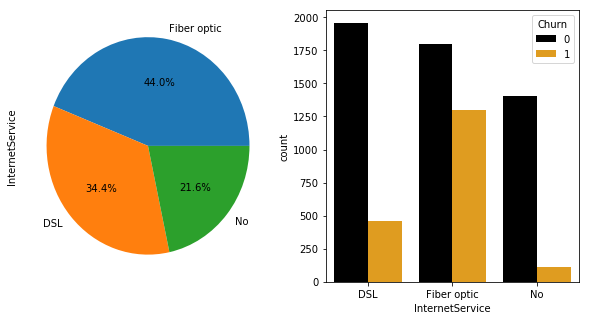

OnlineSecurity


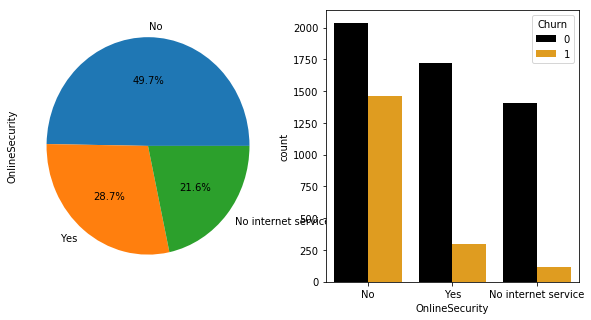

OnlineBackup


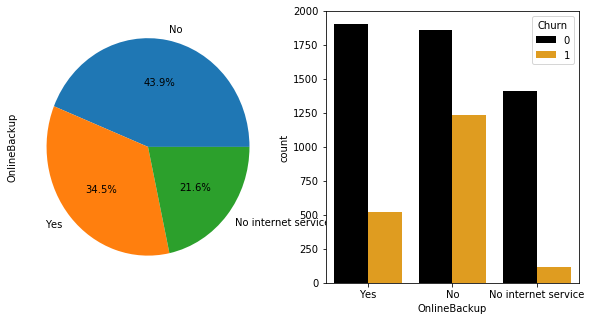

DeviceProtection


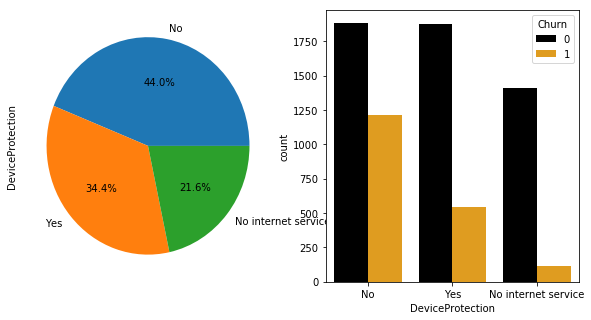

TechSupport


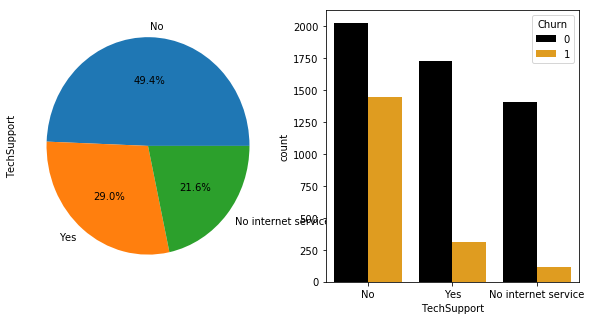

StreamingTV


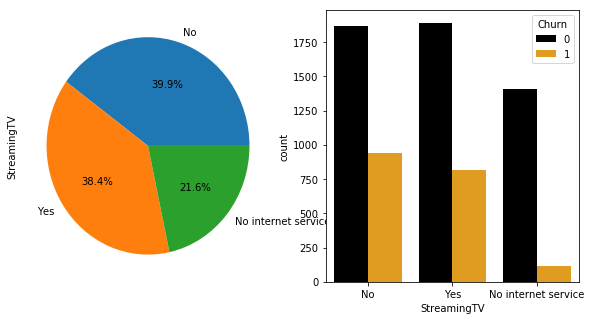

StreamingMovies


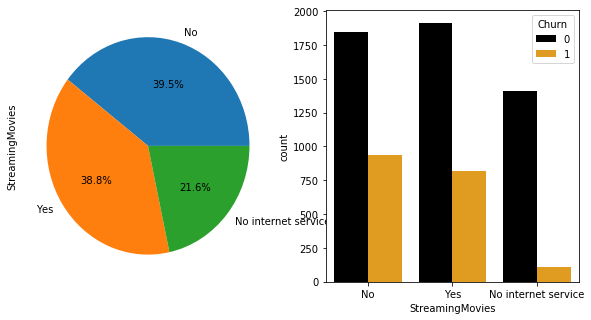

Contract


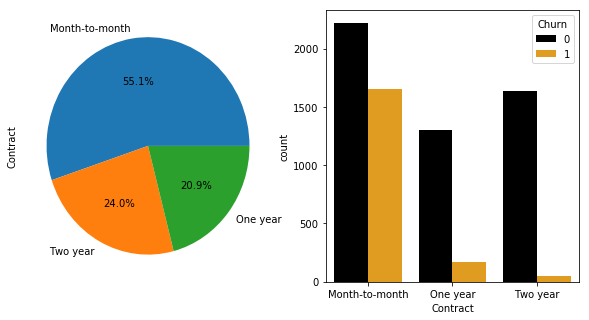

PaperlessBilling


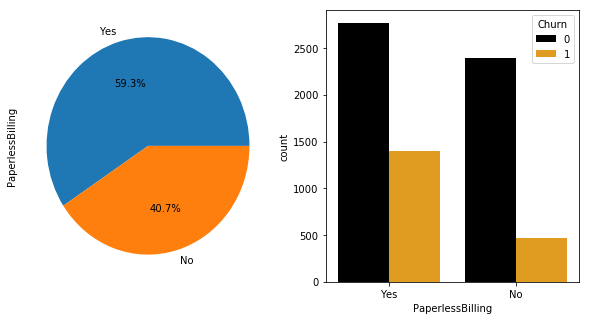

PaymentMethod


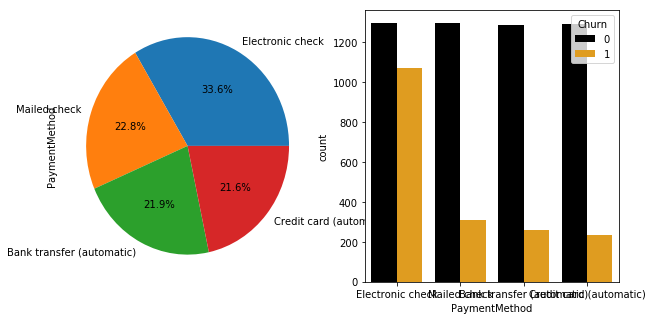

In [227]:
for lbl in df_colnames_cat:
    df = telco_df[[lbl[0],'Churn']]
    print(lbl[0])
    cat_plot(df,lbl[0],'Churn',survival_palette)

# Preprocessing

Since a lot of the data is categorical and I want to find out the most important variables using functions for confusion matrices etc, it's hard to do if the variables are in categorical form. I need to turn them to numbers or IDs

In [9]:
X_analysis = telco_df.drop(['customerID'], axis=1)

In [10]:
df_colnames.iloc[1].values

array(['gender'], dtype=object)

In [11]:
X_analysis['gender'] = X_analysis['gender'].map({'Male':0,'Female':1})
X_analysis['Partner'] = X_analysis['Partner'].map({'No':0,'Yes':1})
X_analysis['Dependents'] = X_analysis['Dependents'].map({'No':0,'Yes':1})
X_analysis['PhoneService'] = X_analysis['PhoneService'].map({'No':0,'Yes':1})
X_analysis['MultipleLines'] = X_analysis['MultipleLines'].map({'No phone service': 0,'No':1,'Yes':2})
X_analysis['InternetService'] = X_analysis['InternetService'].map({'No':0,'DSL':1,'Fiber optic':2})
                                          
for i in range(9,15):
    lbl = df_colnames.iloc[i].values
    X_analysis[lbl[0]] = X_analysis[lbl[0]].map({'No internet service':0,'No':1,'Yes':2})

X_analysis['Contract'] = X_analysis['Contract'].map({'Month-to-month':0,'One year':1,'Two year':2})
X_analysis['PaperlessBilling'] = X_analysis['PaperlessBilling'].map({'No':0,'Yes':1})
X_analysis['PaymentMethod'] = X_analysis['PaymentMethod'].map({'Electronic check':0,'Mailed check':1,
                                                               'Bank transfer (automatic)':2,'Credit card (automatic)':3})


In [12]:
X_analysis.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0,1,1,2,1,1,1,1,0,1,0,29.85,29.85,0
1,0,0,0,0,34,1,1,1,2,1,2,1,1,1,1,0,1,56.95,1889.50,0
2,0,0,0,0,2,1,1,1,2,2,1,1,1,1,0,1,1,53.85,108.15,1
3,0,0,0,0,45,0,0,1,2,1,2,2,1,1,1,0,2,42.30,1840.75,0
4,1,0,0,0,2,1,1,2,1,1,1,1,1,1,0,1,0,70.70,151.65,1


We've cleaned up the data quite a bit but still, to speed up some calculations we can also look to normalize the continuos variables

### Correlation

To select features we can look at the correlation between them. Basically, if 2 features are highly correlated, they are probably roughly telling us the same thing and hance are probably not items we would want to use in our model since they would cause some overfitting and train very well but not test well.

However, we can't just drop the data, we must look to make sense of it

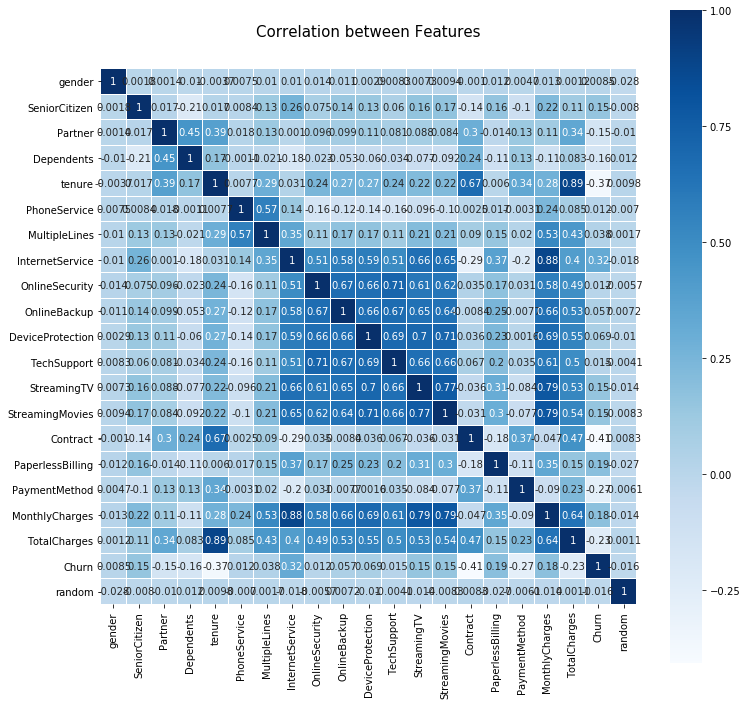

In [28]:
X_plt = X_analysis
X_plt['random'] = np.random.random(size = len(X_plt))

colormap = plt.cm.Blues
plt.figure(figsize=(12,12))
plt.title('Correlation between Features', y=1.05, size = 15)
sns.heatmap(X_plt.corr(method='spearman'),
            linewidths=0.1, 
            vmax=1.0, 
            square=True, 
            cmap=colormap, 
            linecolor='white', 
            annot=True)

#### Insights

Some insights from looking at the confusion matrix

The variables that were most highly correlated were the Monthly charges and Internet Service. Looking at that it seems likely that it would be the case, Looking at a plot, can see the monthly charges go up as Internet Service goes from 'No' to 'Fiber Optic'.

The next were total charges and tenure. This makes sense again, as total charges would be an accumulation of charges over time.

Next was contract and tenure. Again, a two year contract may imply that someone was there for 24 months, and month-to-month contract would be prevalent in clients with a shorter tenure.

Additionally, tenure has a consistent correlation with the the different services available as packages. Possibly since the more packages a client has, the more likely they are to stay on.

Lastly, there was a patch of correlation between the features from InternetService to StreamingMovies. Maybe because of the heading "No Internet service" creating a correlation throughout.

## Feature Importance

We want to find the importance of each feature with respect to the label - Churn. 

There are methods available to us, but which give us the best result, or can we use a combination of predictors to estimate? 

First let's use a random forest checker.

In [14]:
X_analysis_df = X_analysis.drop('Churn', axis = 1)
Y_analysis = X_analysis['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X_analysis_df, Y_analysis, test_size=0.30, random_state=35)

We can use a few feature importance estimators. Let's see an easy one first, the feature importance as estimated by a random forest checker.

In [15]:
rforest_checker = RandomForestClassifier(random_state = 0)

rforest_checker.fit(X_train, y_train)

importances_df = pd.DataFrame(rforest_checker.feature_importances_, 
                              columns=['Feature_Importance'],
                              index=X_train.columns)

importances_df.sort_values(by=['Feature_Importance'], ascending=False, inplace=True)

print(importances_df)

                  Feature_Importance
TotalCharges                0.188045
MonthlyCharges              0.160557
tenure                      0.152771
Contract                    0.086261
PaymentMethod               0.069656
StreamingMovies             0.038069
TechSupport                 0.033649
OnlineBackup                0.030252
gender                      0.027278
OnlineSecurity              0.026815
InternetService             0.026354
PaperlessBilling            0.025568
DeviceProtection            0.024463
Partner                     0.024418
MultipleLines               0.023241
Dependents                  0.019991
StreamingTV                 0.019554
SeniorCitizen               0.018809
PhoneService                0.004249


This seems a little bit off. The analysis was also done with RapidMiner and it seems like it doesn't really link up. Doing a little bit of research I've found that there's a reason. There is a bias in the classifier, especially when looking at continuous variables - of which we have 3 that have been placed at the top

From https://explained.ai/rf-importance/

*"We've known for years that this common mechanism for computing feature importance is biased; i.e. it tends to inflate the importance of continuous or high-cardinality categorical variables"*

So what about another method. *"If we ignore the computation cost of retraining the model, we can get the most accurate feature importance using a brute force drop-column importance mechanism. The idea is to get a baseline performance score as with permutation importance but then drop a column entirely, retrain the model, and recompute the performance score. The importance value of a feature is the difference between the baseline and the score from the model missing that feature. This strategy answers the question of how important a feature is to overall model performance even more directly than the permutation importance strategy."*

Let's use a RandomForestRegressor. 

Set a benchmark model to work with and then compute the importance

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestRegressor(n_estimators = 100,
                           n_jobs = -1,
                           oob_score = True,
                           bootstrap = True,
                           random_state = 35)
rf.fit(X_train, y_train)

print('R^2 Training Score: {:.2f} \nOOB Score: {:.2f} \nR^2 Validation Score: {:.2f}'.format(rf.score(X_train, y_train), 
                                                                                             rf.oob_score_,
                                                                                             rf.score(X_test, y_test)))

rf_class = RandomForestClassifier(n_estimators = 100,
                           n_jobs = -1,
                           oob_score = True,
                           bootstrap = True,
                           random_state = 35)
rf_class.fit(X_train, y_train)

print('\nR^2 Training Score: {:.2f} \nOOB Score: {:.2f} \nR^2 Validation Score: {:.2f}'.format(rf_class.score(X_train, y_train), 
                                                                                             rf_class.oob_score_,
                                                                                             rf_class.score(X_test, y_test)))

R^2 Training Score: 0.89 
OOB Score: 0.23 
R^2 Validation Score: 0.24

R^2 Training Score: 1.00 
OOB Score: 0.79 
R^2 Validation Score: 0.78


So with that, let's compute the importance, looking at a drop column method. 

In [17]:
# function for creating a feature importance dataframe
def imp_df(column_names, importances):
    df = pd.DataFrame({'feature': column_names,
                       'feature_importance': importances}) \
           .sort_values('feature_importance', ascending = False) \
           .reset_index(drop = True)
    return df

# plotting a feature importance dataframe (horizontal barchart)
def var_imp_plot(imp_df, title):
    imp_df.columns = ['feature', 'feature_importance']
    sns.barplot(x = 'feature_importance', y = 'feature', data = imp_df, orient = 'h', color = 'royalblue') \
       .set_title(title, fontsize = 20)

In [18]:
from sklearn.base import clone 

def drop_col_feat_imp(model, X_train, y_train, random_state = 35):
    
    # clone the model to have the exact same specification as the one initially trained
    model_clone = clone(model)
    # set random_state for comparability
    model_clone.random_state = random_state
    # training and scoring the benchmark model
    model_clone.fit(X_train, y_train)
    benchmark_score = model_clone.score(X_train, y_train)
    # list for storing feature importances
    importances = []
    
    # iterating over all columns and storing feature importance (difference between benchmark and new model)
    for col in X_train.columns:
        model_clone = clone(model)
        model_clone.random_state = random_state
        model_clone.fit(X_train.drop(col, axis = 1), y_train)
        drop_col_score = model_clone.score(X_train.drop(col, axis = 1), y_train)
        importances.append(benchmark_score - drop_col_score)
    
    importances_df = imp_df(X_train.columns, importances)
    return importances_df

In [19]:
drop_importances = drop_col_feat_imp(rf, X_train, y_train, random_state = 35)

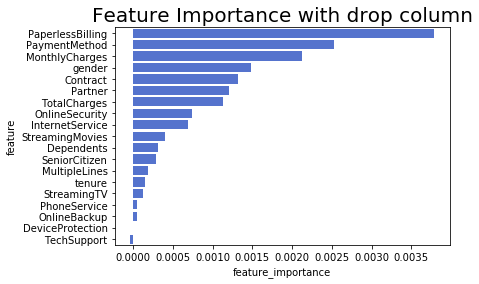

In [20]:
var_imp_plot(drop_importances,'Feature Importance with drop column')

In [29]:
drop_importances

,feature,feature_importance
0,PaperlessBilling,0.003790
1,PaymentMethod,0.002524
2,MonthlyCharges,0.002127
3,gender,0.001479
4,Contract,0.001316
5,Partner,0.001201
6,TotalCharges,0.001129
7,OnlineSecurity,0.000739
8,InternetService,0.000687
9,StreamingMovies,0.000404


From what we can see we can isolate certain variables that have the most effect on churn.

However, what if we were to do it with regard to different categories of the data? Maybe look in to what kind of groupings there are.



In [402]:
# sns.pairplot(X_analysis[['InternetService','OnlineSecurity','OnlineBackup','DeviceProtection']])
